In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
#1) INDICES

In [2]:
PATH = 'D:\\E4\\1606\\' 
FILENAME = 'subset_0_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc'
ds = xr.open_dataset(PATH+FILENAME)  # loading dataset

In [ ]:
ds

In [3]:
#First, we reduce our dataset so that just the spectral bands are used for our analysis.

ds_reduced = ds[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']]
ds_reduced

<xarray.Dataset>
Dimensions:  (lat: 962, lon: 2733)
Coordinates:
  * lat      (lat) float64 51.0 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon      (lon) float64 14.15 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables:
    B1       (lat, lon) float32 ...
    B2       (lat, lon) float32 ...
    B3       (lat, lon) float32 ...
    B4       (lat, lon) float32 ...
    B5       (lat, lon) float32 ...
    B6       (lat, lon) float32 ...
    B7       (lat, lon) float32 ...
    B8       (lat, lon) float32 ...
    B8A      (lat, lon) float32 ...
    B9       (lat, lon) float32 ...
    B11      (lat, lon) float32 ...
    B12      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     385:293
    start_date:   09-APR-2018 10:10:31.026000
    stop_date:    09-APR-2018 10:10:31.026000
    title:        NetCDF/CF Data Product

In [4]:
#Formel für NDVI
def NDVI(ds_reduced):
    ds_reduced['NDVI']=(ds_reduced.B8 - ds_reduced.B4)/(ds_reduced.B8 + ds_reduced.B4)  # Hinzufügen des neuen Bandes NDVI zum Datensatz

In [5]:
#NDVI
NDVI(ds_reduced)

In [8]:
def plotting(ds,vmin='NULL',vmax='NULL',cmap='NULL',title='NULL'):
    fig, ax = plt.subplots(figsize=(12,10))
    ds.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.tight_layout();
    title=title
    plt.title(title, fontsize=22) 

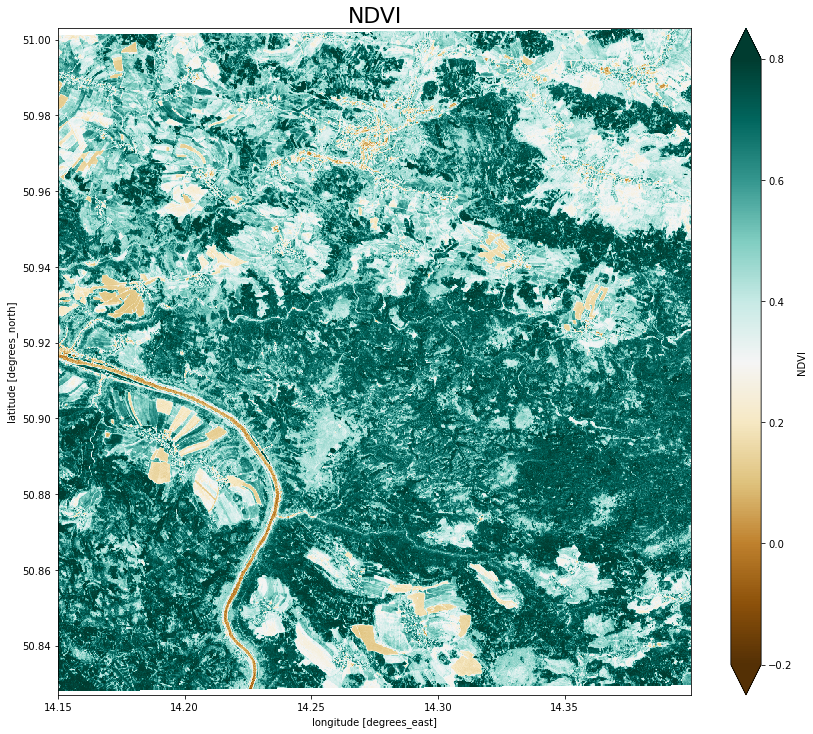

In [9]:
plotting(ds_reduced.NDVI,vmin=-0.2,vmax=0.8, cmap='BrBG',title='NDVI')

In [6]:
# Formel für BRI
def BRI (ds_reduced):
    ds_reduced['BRI'] = (1/1550)  - (1/700) / ds_reduced.B8

In [7]:
#BRI
BRI(ds_reduced)

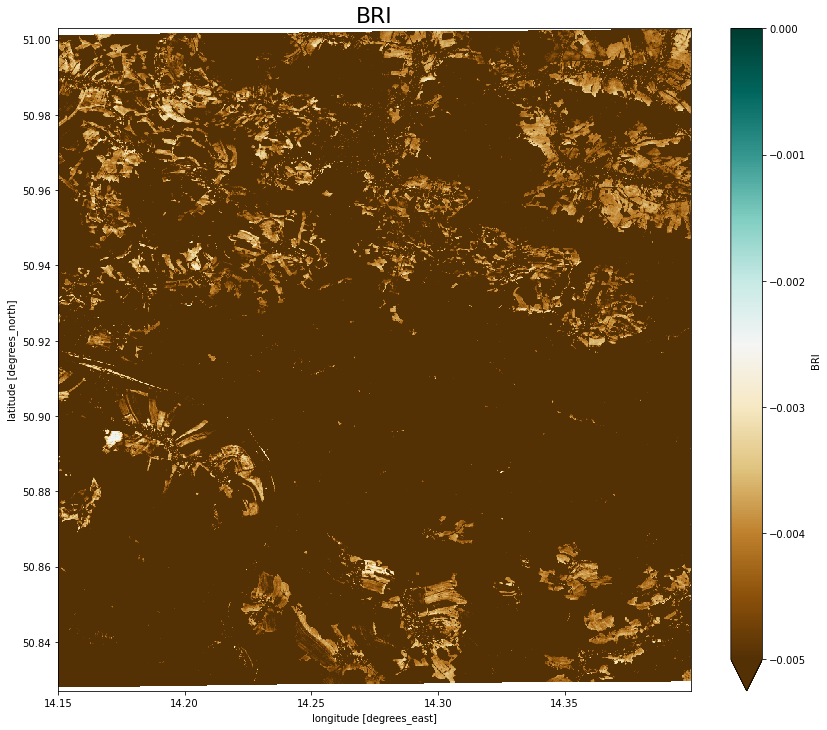

In [12]:
plotting(ds_reduced.BRI,vmin=-0.005,vmax=0.0, cmap='BrBG',title='BRI')

In [8]:
#Formel für GVI
def GVI(ds_reduced):
    ds_reduced['GVI'] = -0.2848 * ds_reduced.B2 - 0.24 * ds_reduced.B3 - 0.5436 * ds_reduced.B4 + 0.7243 * ds_reduced.B8 + 0.0840 * ds_reduced.B11 - 0.1800 * ds_reduced.B12

In [9]:
#GVI
GVI(ds_reduced)

In [10]:
#Formel für WET
def WET(ds_reduced):
    ds_reduced['WET'] = 0.1509 * ds_reduced.B2 +0.1973 * ds_reduced.B3 + 0.3279 * ds_reduced.B4 + 0.3406 * ds_reduced.B8 - 0.7112 * ds_reduced.B11 - 0.4572 * ds_reduced.B12

In [11]:
#WET
WET(ds_reduced)

In [ ]:
#2) UNSUPERVISED CLASSIFICATION

In [12]:
#Convert the xarray to a pandas dataframe in order to apply clustering and PCA afterwards

df = ds_reduced.to_dataframe()  # converting to pandas dataframe
df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12  NDVI  \
lat       lon                                                                  
51.002887 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...   ...   
50.827062 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   

                     BRI  GVI  WET  
lat       lon                       
51.002887 14.149971  NaN  NaN  NaN  
          14.150062  NaN  NaN  NaN  
          14.150154  NaN  NaN  NaN  
          14.150245  NaN  NaN  NaN  
          14.150337  NaN  NaN  NaN  
...                  ...  ...  ...  
50.827062 14.399528  NaN  NaN  NaN  
          14.399620  NaN  NaN  NaN  
          14.399711  NaN  NaN  NaN  
          14.399803  NaN  NaN  NaN  
          14.399894  NaN  NaN  NaN  

[2629146 rows x 16 columns]

In [13]:
#NANs

df.isnull().values.any()  # check if there are any NaNs
df.isnull().sum().sum()  # counting the NaNs in the whole dataframe, sum across columns and rows

714160

In [14]:
#deleting NANs

df = ds_reduced.to_dataframe().dropna(how='any')
df.isnull().sum().sum()

0

In [15]:
#kmeans clustering

n_clusters = 20 #number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0) # init k-means model 
kmeans.fit_predict(df) # apply k-means to data 
print(kmeans.labels_)   # show the cluster number for each data point 

[ 8  8 17 ...  8  8  8]


In [16]:
#Copy the dataframe to a new dataframe and add the cluster label for each pixel.

df_cluster = df
df_cluster['KMeanCluster'] = kmeans.labels_  # adding the labels to our dataset


In [44]:
#NEW COLUMN FOR LABELING

df_cluster['ClusterNumber'] = df_cluster.KMeanCluster

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster  ClusterNumber  
lat       lon                                                                   
51.002521 14.368608 -0.009805  0.081019 -0.004588             8              8  
          14.368700 -0.011132  0.068631 -0.013443             8              8  
          14.368791 -0.011628  0.061507 -0.012934            17             17  
          14.368883 -0.011628  0.061507 -0.012934            17             17  
          14.368974 -0.009544  0.076990 -0.007945             8              8  
...                       ...       ...       ...           ...            ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8              8  
          14.156192 -0.009937  0.079545 -0.008331             8              8  
          14.156283 -0.009937  0.079545 -0.008331             8              8  
          14.156375 -0.011260  0.070817 -0.004172             8              8  
          14.156466 -0.011554  0.068822 -0.005274             8              8  

[2584511 rows x 18 columns]

In [18]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:        (lat: 954, lon: 2733)
Coordinates:
  * lat            (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/18)
    B1             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B2             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B3             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B4             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B5             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B6             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    NDVI           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    BRI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    GVI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    WET            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    KMeanCluster   (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ClusterNumber  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [19]:
SAVING_FILENAME = "27_new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

In [123]:
#Defines a function to plot the clustering result as a thematic map

def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL'):  # modifying plotting function to achieve a discrete colorbar
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,10), dpi=100)
    ax.imshow(ds[variable],cmap=cmap, aspect='auto')
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters), fraction=0.042, pad=0.02)

    cbar.set_label('cluster')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    
    plt.tight_layout()
    plt.title(title, fontsize=22)
    
    plt.savefig('D:\\E4\\27_kmeans_clustering_april_new.png')

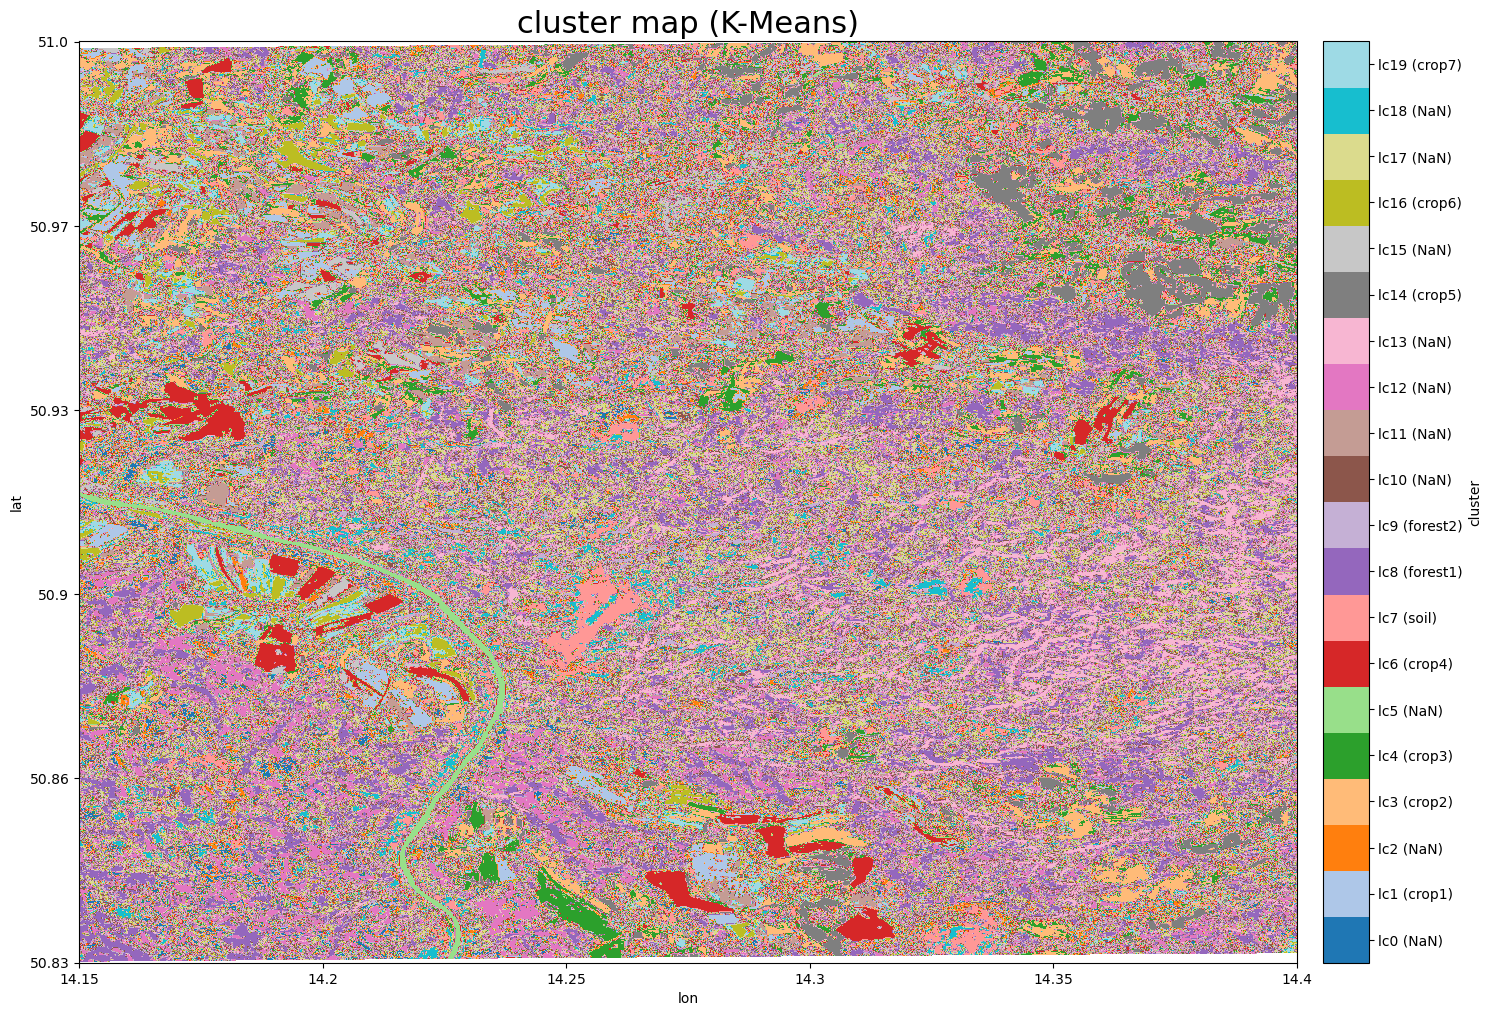

In [57]:
cmap = plt.cm.get_cmap('tab20', n_clusters)  # create colormap
legend_labels = ['lc0 (NaN)', 'lc1 (crop1)', 'lc2 (NaN)', 'lc3 (crop2)', 'lc4 (crop3)', 'lc5 (NaN)', 'lc6 (crop4)', 'lc7 (soil)', 'lc8 (forest1)', 'lc9 (forest2)','lc10 (NaN)', 'lc11 (NaN)', 'lc12 (NaN)', 'lc13 (NaN)' , 'lc14 (crop5)', 'lc15 (NaN)', 'lc16 (crop6)', 'lc17 (NaN)', 'lc18 (NaN)', 'lc19 (crop7)']  # define legend labels
title = 'cluster map (K-Means)'  # set figure title

plotting_lc(ds_cluster, variable='KMeanCluster', n_clusters=n_clusters, cmap=cmap, legend_labels=legend_labels,
            title=title)

In [46]:
uniques = df_cluster.ClusterNumber.drop_duplicates()

print(uniques)

lat        lon      
51.002521  14.368608     8
           14.368791    17
           14.369797    12
           14.371261     0
           14.374920    10
           14.375835    18
           14.376110     7
           14.377207     2
           14.377482     1
           14.377665    11
           14.378397    19
           14.380409     4
           14.380684    14
           14.381324     3
           14.392942    15
51.002338  14.336773    13
           14.337596     9
51.001972  14.309146     6
51.001789  14.257551    16
50.996666  14.302377     5
Name: ClusterNumber, dtype: int32


In [49]:
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([1],'21')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([3],'22')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([4],'23')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([6],'24')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([14],'25')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([16],'26')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([19],'27')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([8],'28')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([9],'29')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([7],'30')
df_cluster['ClusterNumber'] = df_cluster['ClusterNumber'].replace([0,2,5,17,10,11,12,13,15,18],'NaN')

df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster ClusterNumber  
lat       lon                                                                  
51.002521 14.368608 -0.009805  0.081019 -0.004588             8            28  
          14.368700 -0.011132  0.068631 -0.013443             8            28  
          14.368791 -0.011628  0.061507 -0.012934            17           NaN  
          14.368883 -0.011628  0.061507 -0.012934            17           NaN  
          14.368974 -0.009544  0.076990 -0.007945             8            28  
...                       ...       ...       ...           ...           ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8            28  
          14.156192 -0.009937  0.079545 -0.008331             8            28  
          14.156283 -0.009937  0.079545 -0.008331             8            28  
          14.156375 -0.011260  0.070817 -0.004172             8            28  
          14.156466 -0.011554  0.068822 -0.005274             8            28  

[2584511 rows x 18 columns]

In [51]:
df_cluster['ClusterNumber'] = pd.to_numeric(df_cluster['ClusterNumber'],errors = 'coerce')

In [52]:
df_cluster

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
51.002521 14.368608  0.0168  0.0124  0.0211  0.0160  0.0393  0.1078  0.1297   
          14.368700  0.0168  0.0125  0.0223  0.0177  0.0398  0.1037  0.1198   
          14.368791  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368883  0.0168  0.0145  0.0235  0.0227  0.0398  0.1037  0.1198   
          14.368974  0.0168  0.0174  0.0256  0.0222  0.0414  0.1020  0.1200   
...                     ...     ...     ...     ...     ...     ...     ...   
50.828160 14.156100  0.0201  0.0135  0.0261  0.0187  0.0418  0.1051  0.1316   
          14.156192  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156283  0.0201  0.0130  0.0244  0.0147  0.0418  0.1051  0.1316   
          14.156375  0.0201  0.0114  0.0220  0.0143  0.0368  0.0940  0.1172   
          14.156466  0.0201  0.0116  0.0211  0.0144  0.0368  0.0940  0.1172   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
51.002521 14.368608  0.1367  0.1439  0.1387  0.0656  0.0345  0.790439   
          14.368700  0.1213  0.1305  0.1387  0.0704  0.0367  0.745324   
          14.368791  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368883  0.1164  0.1305  0.1387  0.0704  0.0367  0.673616   
          14.368974  0.1402  0.1335  0.1387  0.0726  0.0416  0.726601   
...                     ...     ...     ...     ...     ...       ...   
50.828160 14.156100  0.1470  0.1471  0.1443  0.0694  0.0362  0.774291   
          14.156192  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156283  0.1350  0.1471  0.1443  0.0694  0.0362  0.803607   
          14.156375  0.1200  0.1330  0.1443  0.0609  0.0273  0.787044   
          14.156466  0.1171  0.1330  0.1443  0.0609  0.0273  0.780989   

                          BRI       GVI       WET  KMeanCluster  ClusterNumber  
lat       lon                                                                   
51.002521 14.368608 -0.009805  0.081019 -0.004588             8           28.0  
          14.368700 -0.011132  0.068631 -0.013443             8           28.0  
          14.368791 -0.011628  0.061507 -0.012934            17            NaN  
          14.368883 -0.011628  0.061507 -0.012934            17            NaN  
          14.368974 -0.009544  0.076990 -0.007945             8           28.0  
...                       ...       ...       ...           ...            ...  
50.828160 14.156100 -0.009073  0.085512 -0.002521             8           28.0  
          14.156192 -0.009937  0.079545 -0.008331             8           28.0  
          14.156283 -0.009937  0.079545 -0.008331             8           28.0  
          14.156375 -0.011260  0.070817 -0.004172             8           28.0  
          14.156466 -0.011554  0.068822 -0.005274             8           28.0  

[2584511 rows x 18 columns]

In [53]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_cluster = df_cluster.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_cluster = ds_cluster.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_cluster

<xarray.Dataset>
Dimensions:        (lat: 954, lon: 2733)
Coordinates:
  * lat            (lat) float64 51.0 51.0 51.0 51.0 ... 50.83 50.83 50.83 50.83
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/18)
    B1             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B2             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B3             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B4             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B5             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    B6             (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ...             ...
    NDVI           (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    BRI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    GVI            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    WET            (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    KMeanCluster   (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    ClusterNumber  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [54]:
SAVING_FILENAME = "27_new_new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
ds_cluster.to_netcdf(PATH + SAVING_FILENAME)

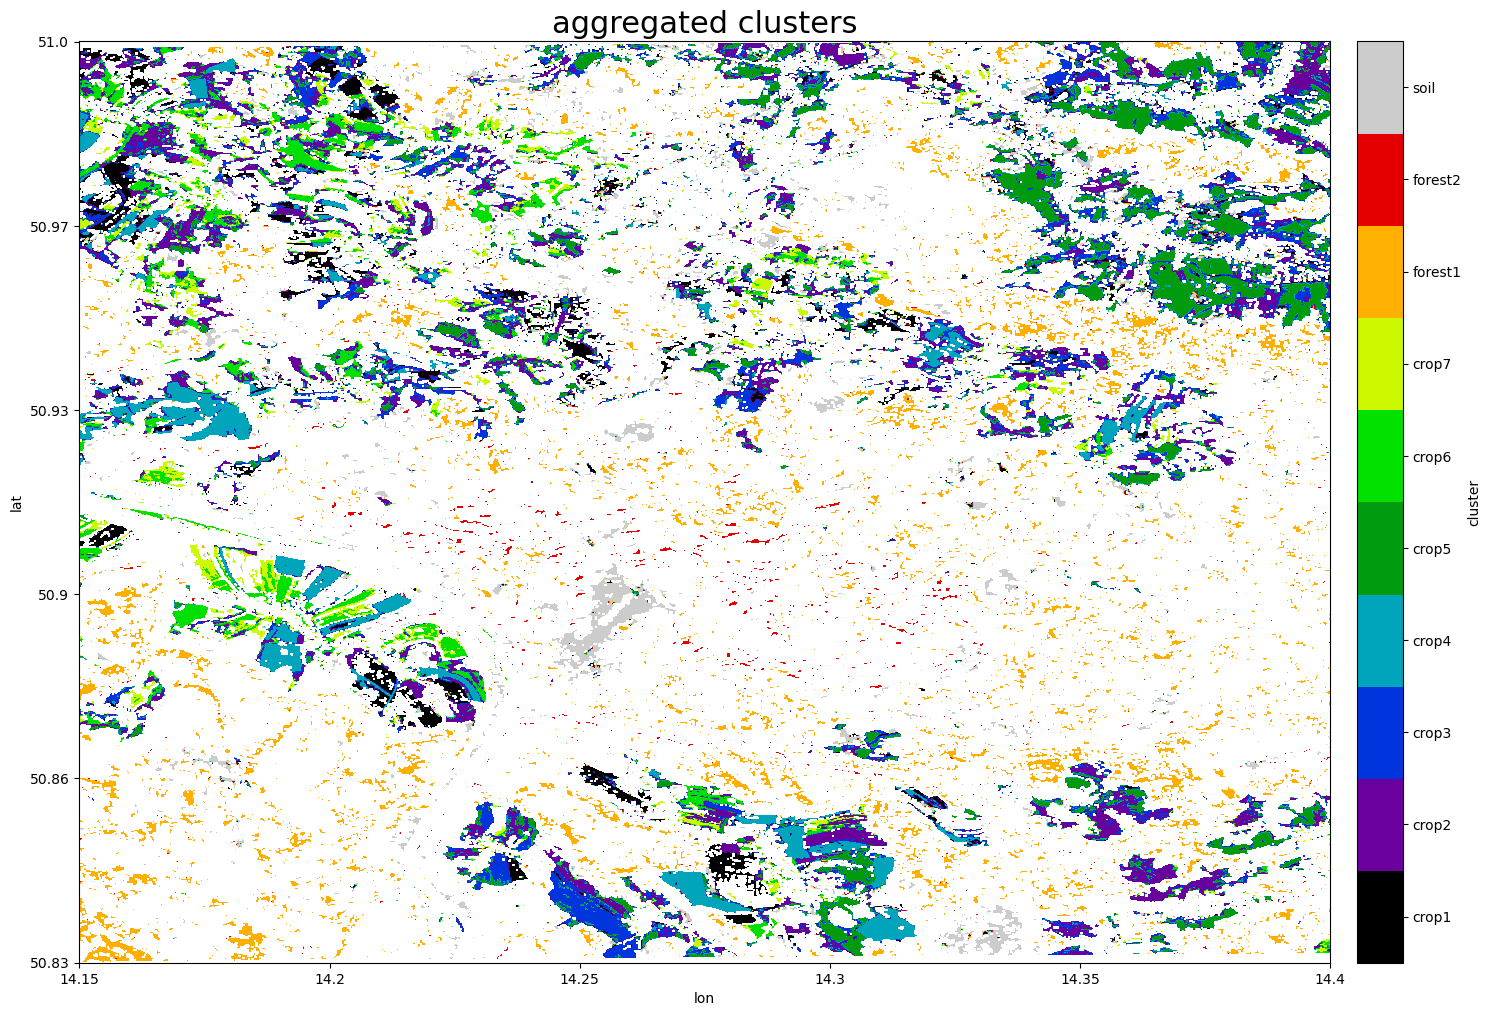

In [120]:
cmap = plt.cm.get_cmap('nipy_spectral', 10)  # create colormap
legend_labels = ['crop1', 'crop2', 'crop3', 'crop4', 'crop5', 'crop6', 'crop7', 'forest1', 'forest2', 'soil']  # define legend labels
title = 'aggregated clusters'  # set figure title

plotting_lc(ds_cluster, variable='ClusterNumber', n_clusters=10, cmap=cmap, legend_labels=legend_labels,
            title=title)

plt.savefig('D:\\E4\\27_kmeans_aggregated_clusters.png')

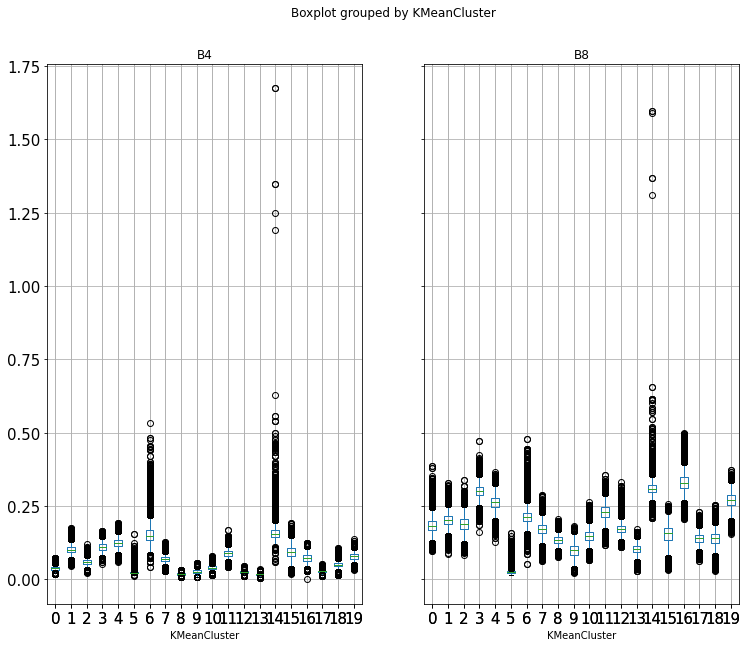

In [58]:
#You can also plot a boxplot to look at the distribution of reflectances in each cluster.

boxplot = df_cluster.boxplot(column=['B4', 'B8'], by='KMeanCluster', figsize=(12,10), fontsize=15)
plt.savefig('D:\\E4\\boxplot_kmeans_clustering_april')

In [ ]:
#JOIN REFERENCE DATA

In [59]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline

In [96]:
combined_ds = xr.open_mfdataset(['D:\\E4\\1606\\27_new_new_kmeans_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc', 'D:\\E4\\1606\\subset_0_of_borkenkaeferbefall2018.nc', 'D:\\E4\\subset_0_of_referenceData2018.nc'],combine = 'by_coords')

combined_ds

<xarray.Dataset>
Dimensions:        (lat: 962, lon: 2733)
Coordinates:
  * lat            (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/20)
    B1             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B2             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B3             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B4             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B5             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B6             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ...             ...
    GVI            (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    WET            (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    KMeanCluster   (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ClusterNumber  (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    befall2018     (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    referenceData  (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>

In [97]:
combined_ds['barkbeetle'] = combined_ds.ClusterNumber.where(combined_ds['befall2018'] !=1, 10)

combined_ds

<xarray.Dataset>
Dimensions:        (lat: 962, lon: 2733)
Coordinates:
  * lat            (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon            (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/21)
    B1             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B2             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B3             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B4             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B5             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B6             (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ...             ...
    WET            (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    KMeanCluster   (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ClusterNumber  (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    befall2018     (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    referenceData  (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    barkbeetle     (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>

In [98]:
combined_ds['barkbeetle_water'] = combined_ds.barkbeetle.where(combined_ds['referenceData'] !=8.0, 15)

combined_ds

<xarray.Dataset>
Dimensions:           (lat: 962, lon: 2733)
Coordinates:
  * lat               (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0
  * lon               (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4
Data variables: (12/22)
    B1                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B2                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B3                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B4                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B5                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    B6                (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ...                ...
    KMeanCluster      (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    ClusterNumber     (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    befall2018        (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    referenceData     (lat, lon) float32 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    barkbeetle        (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>
    barkbeetle_water  (lat, lon) float64 dask.array<chunksize=(962, 2733), meta=np.ndarray>

In [99]:
combined_df = combined_ds.to_dataframe()  # converting to pandas dataframe
combined_df.barkbeetle_water.value_counts()

28.0    300698
30.0    167994
22.0    117543
23.0    111809
21.0    108008
25.0     96271
29.0     90440
27.0     83547
24.0     55071
26.0     46689
10.0     39948
15.0      3543
Name: barkbeetle_water, dtype: int64

In [100]:
#NEW COLUMN

combined_df['official_reference'] = combined_df.barkbeetle_water

combined_df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  ...  BRI  GVI  \
lat       lon                                                 ...             
50.827062 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...  ...   
51.002887 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  ...  NaN  NaN   

                     WET  KMeanCluster  ClusterNumber  befall2018  \
lat       lon                                                       
50.827062 14.149971  NaN           NaN            NaN         NaN   
          14.150062  NaN           NaN            NaN         NaN   
          14.150154  NaN           NaN            NaN         NaN   
          14.150245  NaN           NaN            NaN         NaN   
          14.150337  NaN           NaN            NaN         NaN   
...                  ...           ...            ...         ...   
51.002887 14.399528  NaN           NaN            NaN         NaN   
          14.399620  NaN           NaN            NaN         NaN   
          14.399711  NaN           NaN            NaN         NaN   
          14.399803  NaN           NaN            NaN         NaN   
          14.399894  NaN           NaN            NaN         NaN   

                     referenceData  barkbeetle  barkbeetle_water  \
lat       lon                                                      
50.827062 14.149971            NaN         NaN               NaN   
          14.150062            NaN         NaN               NaN   
          14.150154            NaN         NaN               NaN   
          14.150245            NaN         NaN               NaN   
          14.150337            NaN         NaN               NaN   
...                            ...         ...               ...   
51.002887 14.399528            NaN         NaN               NaN   
          14.399620            NaN         NaN               NaN   
          14.399711            NaN         NaN               NaN   
          14.399803            NaN         NaN               NaN   
          14.399894            NaN         NaN               NaN   

                     official_reference  
lat       lon                            
50.827062 14.149971                 NaN  
          14.150062                 NaN  
          14.150154                 NaN  
          14.150245                 NaN  
          14.150337                 NaN  
...                                 ...  
51.002887 14.399528                 NaN  
          14.399620                 NaN  
          14.399711                 NaN  
          14.399803                 NaN  
          14.399894                 NaN  

[2629146 rows x 23 columns]

In [101]:
uniques = combined_df.official_reference.drop_duplicates()

print(uniques)

lat        lon      
50.827062  14.149971     NaN
50.828160  14.149971    28.0
50.828343  14.177964    29.0
50.828526  14.150062    30.0
50.828892  14.255173    21.0
           14.255264    23.0
           14.257460    25.0
50.829074  14.236420    27.0
           14.271182    24.0
50.829440  14.235230    26.0
           14.345738    22.0
50.874997  14.236145    15.0
50.885792  14.308506    10.0
Name: official_reference, dtype: float64


In [102]:
del combined_df['barkbeetle_water']
del combined_df['barkbeetle']
del combined_df['ClusterNumber']
del combined_df['referenceData']

combined_df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12  NDVI  \
lat       lon                                                                  
50.827062 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...   ...   
51.002887 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   

                     BRI  GVI  WET  KMeanCluster  befall2018  \
lat       lon                                                  
50.827062 14.149971  NaN  NaN  NaN           NaN         NaN   
          14.150062  NaN  NaN  NaN           NaN         NaN   
          14.150154  NaN  NaN  NaN           NaN         NaN   
          14.150245  NaN  NaN  NaN           NaN         NaN   
          14.150337  NaN  NaN  NaN           NaN         NaN   
...                  ...  ...  ...           ...         ...   
51.002887 14.399528  NaN  NaN  NaN           NaN         NaN   
          14.399620  NaN  NaN  NaN           NaN         NaN   
          14.399711  NaN  NaN  NaN           NaN         NaN   
          14.399803  NaN  NaN  NaN           NaN         NaN   
          14.399894  NaN  NaN  NaN           NaN         NaN   

                     official_reference  
lat       lon                            
50.827062 14.149971                 NaN  
          14.150062                 NaN  
          14.150154                 NaN  
          14.150245                 NaN  
          14.150337                 NaN  
...                                 ...  
51.002887 14.399528                 NaN  
          14.399620                 NaN  
          14.399711                 NaN  
          14.399803                 NaN  
          14.399894                 NaN  

[2629146 rows x 19 columns]

In [103]:
del combined_df['befall2018']

combined_df

B1  B2  B3  B4  B5  B6  B7  B8  B8A  B9  B11  B12  NDVI  \
lat       lon                                                                  
50.827062 14.149971 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150062 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150154 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150245 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.150337 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
...                  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...   ...   
51.002887 14.399528 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399620 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399711 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399803 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   
          14.399894 NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN  NaN  NaN   NaN   

                     BRI  GVI  WET  KMeanCluster  official_reference  
lat       lon                                                         
50.827062 14.149971  NaN  NaN  NaN           NaN                 NaN  
          14.150062  NaN  NaN  NaN           NaN                 NaN  
          14.150154  NaN  NaN  NaN           NaN                 NaN  
          14.150245  NaN  NaN  NaN           NaN                 NaN  
          14.150337  NaN  NaN  NaN           NaN                 NaN  
...                  ...  ...  ...           ...                 ...  
51.002887 14.399528  NaN  NaN  NaN           NaN                 NaN  
          14.399620  NaN  NaN  NaN           NaN                 NaN  
          14.399711  NaN  NaN  NaN           NaN                 NaN  
          14.399803  NaN  NaN  NaN           NaN                 NaN  
          14.399894  NaN  NaN  NaN           NaN                 NaN  

[2629146 rows x 18 columns]

In [20]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.

ds_reference = combined_df.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
ds_reference = ds_reference.sortby('lon')  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
ds_reference

<xarray.Dataset>
Dimensions:         (lat: 954, lon: 2733)
Coordinates:
  * lat             (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0
  * lon             (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4
Data variables: (12/20)
    B1              (lat, lon) float32 0.0218 0.0208 0.0208 ... 0.0586 0.0586
    B2              (lat, lon) float32 0.0112 0.0103 0.0103 ... 0.0578 0.0633
    B3              (lat, lon) float32 0.0231 0.0219 0.0219 ... 0.0835 0.09
    B4              (lat, lon) float32 0.0172 0.0145 0.0145 ... 0.0916 0.1064
    B5              (lat, lon) float32 0.0431 0.037 0.037 ... 0.1415 0.1415
    B6              (lat, lon) float32 0.0969 0.0909 0.0909 ... 0.1986 0.1986
    ...              ...
    GVI             (lat, lon) float32 0.08658 0.07669 ... 0.09255 0.08544
    WET             (lat, lon) float32 -0.01283 -0.01574 ... -0.1399 -0.131
    KMeanCluster    (lat, lon) float64 8.0 8.0 8.0 8.0 8.0 ... 3.0 3.0 3.0 3.0
    ClusterNumber   (lat, lon) float64 22.0 22.0 22.0 22.0 ... 21.0 21.0 21.0
    befall2018      (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ClusterNumber2  (lat, lon) float64 22.0 22.0 22.0 22.0 ... 21.0 21.0 21.0

In [106]:
#Convert the clustering result back to xarray to make a map and save the result as NetCDF.
combined_ds = combined_df.to_xarray()  # converting the dataframe to an xarray dataset for easy plotting
  # and sorting the longitude to avoid raising an error while plotting and being able
                                       # to save the data correctly
combined_ds

<xarray.Dataset>
Dimensions:             (lat: 962, lon: 2733)
Coordinates:
  * lat                 (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0
  * lon                 (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4
Data variables: (12/18)
    B1                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    B2                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    B3                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    B4                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    B5                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    B6                  (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    ...                  ...
    NDVI                (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    BRI                 (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    GVI                 (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    WET                 (lat, lon) float32 nan nan nan nan ... nan nan nan nan
    KMeanCluster        (lat, lon) float64 nan nan nan nan ... nan nan nan nan
    official_reference  (lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [125]:
uniques = combined_df.official_reference.drop_duplicates()

print(uniques)

lat        lon      
50.827062  14.149971     NaN
50.828160  14.149971    28.0
50.828343  14.177964    29.0
50.828526  14.150062    30.0
50.828892  14.255173    21.0
           14.255264    23.0
           14.257460    25.0
50.829074  14.236420    27.0
           14.271182    24.0
50.829440  14.235230    26.0
           14.345738    22.0
50.874997  14.236145    15.0
50.885792  14.308506    10.0
Name: official_reference, dtype: float64


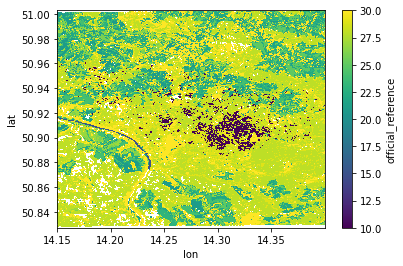

In [128]:
combined_ds.official_reference.plot()

In [130]:
SAVING_FILENAME = "27_ds_reference_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
combined_ds.to_netcdf(PATH + SAVING_FILENAME)

In [1]:
#3) SUPERVISED CLASSIFICATION

In [2]:
PATH = 'D:\\E4\\1606\\'
FILENAME_2018 = "projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_2019 = "projected_Subset_S2B_MSIL2A_20190419T101029_N0211_R022_T33UVS_20190419T132322_resampled_wt.nc"
FILENAME_REF_2018 = "27_ds_reference_clustered_subset_april_of_projected_Subset_S2A_MSIL2A_20180409T101031_N0207_R022_T33UVS_20180409T154909_resampled_wt.nc"
FILENAME_REF_2019 = "barkbeetlearea2019.nc"
data2018 = PATH + FILENAME_2018
data2019 = PATH + FILENAME_2019
ref2018 = PATH + FILENAME_REF_2018
ref2019 = PATH + FILENAME_REF_2019

In [5]:
ds_sc = xr.open_mfdataset([data2018, data2019, ref2018, ref2019])  # this is an option to open and instantly merge the data into one dataset
ds_sc = ds_sc.drop('spatial_ref')
ds_sc

<xarray.Dataset>
Dimensions:                       (lat: 2887, lon: 7714, time: 3)
Coordinates:
  * lat                           (lat) float64 50.83 50.83 50.83 ... 51.0 51.0
  * lon                           (lon) float64 14.0 14.0 14.0 ... 14.45 14.45
  * time                          (time) datetime64[ns] 2018-04-09 ... 2019-0...
Data variables: (12/54)
    B1                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B2                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B3                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B4                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B5                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B6                            (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    ...                            ...
    view_azimuth_B10              (time, lat, lon) float32 dask.array<chunksize=(1, 2887, 7714), meta=np.ndarray>
    view_zenith_B11               (time, lat, lon) float32 dask.array<chunksize=(1, 2887, 7714), meta=np.ndarray>
    view_azimuth_B11              (time, lat, lon) float32 dask.array<chunksize=(1, 2887, 7714), meta=np.ndarray>
    view_zenith_B12               (time, lat, lon) float32 dask.array<chunksize=(1, 2887, 7714), meta=np.ndarray>
    view_azimuth_B12              (time, lat, lon) float32 dask.array<chunksize=(1, 2887, 7714), meta=np.ndarray>
    befall2019                    (time, lat, lon) float32 dask.array<chunksize=(3, 2887, 7714), meta=np.ndarray>

In [6]:
ds_sc = ds_sc[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET', 'official_reference', 'befall2019']]
ds_sc

<xarray.Dataset>
Dimensions:             (lat: 2887, lon: 7714, time: 3)
Coordinates:
  * lat                 (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0
  * lon                 (lon) float64 14.0 14.0 14.0 14.0 ... 14.45 14.45 14.45
  * time                (time) datetime64[ns] 2018-04-09 2019-04-19 2019-09-21
Data variables: (12/18)
    B1                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B2                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B3                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B4                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B5                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    B6                  (lat, lon, time) float32 dask.array<chunksize=(2887, 7714, 1), meta=np.ndarray>
    ...                  ...
    NDVI                (lat, lon) float32 dask.array<chunksize=(2887, 7714), meta=np.ndarray>
    BRI                 (lat, lon) float32 dask.array<chunksize=(2887, 7714), meta=np.ndarray>
    GVI                 (lat, lon) float32 dask.array<chunksize=(2887, 7714), meta=np.ndarray>
    WET                 (lat, lon) float32 dask.array<chunksize=(2887, 7714), meta=np.ndarray>
    official_reference  (lat, lon) float64 dask.array<chunksize=(2887, 7714), meta=np.ndarray>
    befall2019          (time, lat, lon) float32 dask.array<chunksize=(3, 2887, 7714), meta=np.ndarray>

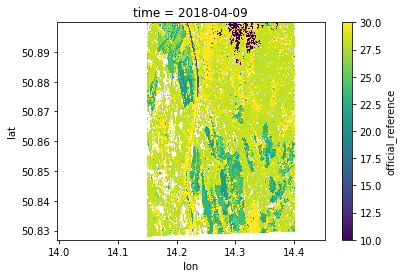

In [7]:
ds_train = ds_sc.sel(**{'time':'2018-04-09', 'lat': slice(None, 50.9)})
ds_train.official_reference.plot()  # have a quick look on the data

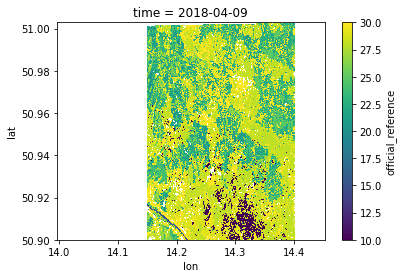

In [8]:
ds_test = ds_sc.sel(**{'time':'2018-04-09', 'lat': slice(50.9, None)})
ds_test.official_reference.plot()

In [9]:
df_train = ds_train[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET', 'official_reference']].to_dataframe().dropna(how='any')
df_train

B1      B2      B3      B4      B5      B6      B7  \
lat      lon                                                                 
50.82816 14.149971  0.0218  0.0112  0.0231  0.0172  0.0431  0.0969  0.1231   
         14.150062  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
         14.150154  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
         14.150245  0.0208  0.0115  0.0182  0.0133  0.0370  0.0909  0.0956   
         14.150337  0.0208  0.0097  0.0178  0.0167  0.0396  0.0985  0.1132   
...                    ...     ...     ...     ...     ...     ...     ...   
50.89988 14.398522  0.0197  0.0305  0.0437  0.0396  0.0468  0.0844  0.0950   
         14.398614  0.0197  0.0343  0.0439  0.0438  0.0468  0.0844  0.0950   
         14.398705  0.0197  0.0343  0.0439  0.0438  0.0468  0.0844  0.0950   
         14.398797  0.0184  0.0249  0.0363  0.0341  0.0494  0.1003  0.1075   
         14.398888  0.0184  0.0249  0.0363  0.0341  0.0494  0.1003  0.1075   

                        B8     B8A      B9     B11     B12      NDVI  \
lat      lon                                                           
50.82816 14.149971  0.1464  0.1379  0.1645  0.0769  0.0435  0.789731   
         14.150062  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
         14.150154  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
         14.150245  0.1223  0.1181  0.1442  0.0716  0.0436  0.803835   
         14.150337  0.1413  0.1370  0.1442  0.0670  0.0363  0.788608   
...                    ...     ...     ...     ...     ...       ...   
50.89988 14.398522  0.1128  0.1133  0.1139  0.0849  0.0544  0.480315   
         14.398614  0.1265  0.1133  0.1139  0.0849  0.0544  0.485614   
         14.398705  0.1265  0.1133  0.1139  0.0849  0.0544  0.485614   
         14.398797  0.1266  0.1201  0.1125  0.0838  0.0493  0.575607   
         14.398888  0.1266  0.1201  0.1125  0.0838  0.0493  0.575607   

                         BRI       GVI       WET  official_reference  \
lat      lon                                                           
50.82816 14.149971 -0.009113  0.086583 -0.012828                28.0   
         14.150062 -0.010293  0.076688 -0.015744                28.0   
         14.150154 -0.010293  0.076688 -0.015744                28.0   
         14.150245 -0.011036  0.071875 -0.019513                28.0   
         14.150337 -0.009465  0.085325 -0.005668                28.0   
...                      ...       ...       ...                 ...   
50.89988 14.398522 -0.012019  0.038340 -0.020624                29.0   
         14.398614 -0.010648  0.044849 -0.013967                29.0   
         14.398705 -0.010648  0.044849 -0.013967                29.0   
         14.398797 -0.010639  0.055521 -0.016918                29.0   
         14.398888 -0.010639  0.055521 -0.016918                29.0   

                         time  
lat      lon                   
50.82816 14.149971 2018-04-09  
         14.150062 2018-04-09  
         14.150154 2018-04-09  
         14.150245 2018-04-09  
         14.150337 2018-04-09  
...                       ...  
50.89988 14.398522 2018-04-09  
         14.398614 2018-04-09  
         14.398705 2018-04-09  
         14.398797 2018-04-09  
         14.398888 2018-04-09  

[432599 rows x 18 columns]

In [10]:
df_test = ds_test[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET', 'official_reference']].to_dataframe().dropna(how='any')
df_test

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
50.900063 14.149971  0.0403  0.0557  0.0844  0.0850  0.1345  0.2369  0.2843   
          14.150062  0.0403  0.0532  0.0846  0.0846  0.1345  0.2369  0.2843   
          14.150154  0.0403  0.0532  0.0846  0.0846  0.1345  0.2369  0.2843   
          14.150245  0.0403  0.0508  0.0792  0.0801  0.1265  0.2205  0.2704   
          14.150337  0.0403  0.0507  0.0756  0.0782  0.1265  0.2205  0.2704   
...                     ...     ...     ...     ...     ...     ...     ...   
51.002521 14.399528  0.0586  0.0771  0.1087  0.1288  0.1929  0.2681  0.2950   
          14.399620  0.0586  0.0624  0.0996  0.1146  0.1929  0.2681  0.2950   
          14.399711  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399803  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399894  0.0586  0.0633  0.0900  0.1064  0.1415  0.1986  0.2281   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
50.900063 14.149971  0.3453  0.3288  0.2751  0.2801  0.1699  0.604927   
          14.150062  0.3446  0.3288  0.2751  0.2801  0.1699  0.605778   
          14.150154  0.3446  0.3288  0.2751  0.2801  0.1699  0.605778   
          14.150245  0.3258  0.3083  0.2751  0.2544  0.1529  0.605322   
          14.150337  0.3136  0.3083  0.2751  0.2544  0.1529  0.600817   
...                     ...     ...     ...     ...     ...       ...   
51.002521 14.399528  0.3274  0.3276  0.3092  0.3192  0.2073  0.435335   
          14.399620  0.3079  0.3276  0.3092  0.3192  0.2073  0.457515   
          14.399711  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399803  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399894  0.2662  0.2696  0.3092  0.2798  0.1856  0.428878   

                          BRI       GVI       WET  official_reference  \
lat       lon                                                           
50.900063 14.149971 -0.003492  0.160722 -0.106347                26.0   
          14.150062 -0.003500  0.161096 -0.107055                26.0   
          14.150154 -0.003500  0.161096 -0.107055                26.0   
          14.150245 -0.003740  0.152806 -0.090311                26.0   
          14.150337 -0.003910  0.145895 -0.095815                26.0   
...                       ...       ...       ...                 ...   
51.002521 14.399528 -0.003718  0.108573 -0.134966                22.0   
          14.399620 -0.003995  0.108539 -0.150277                22.0   
          14.399711 -0.004837  0.092553 -0.139858                22.0   
          14.399803 -0.004837  0.092553 -0.139858                22.0   
          14.399894 -0.004721  0.085437 -0.130985                22.0   

                          time  
lat       lon                   
50.900063 14.149971 2018-04-09  
          14.150062 2018-04-09  
          14.150154 2018-04-09  
          14.150245 2018-04-09  
          14.150337 2018-04-09  
...                        ...  
51.002521 14.399528 2018-04-09  
          14.399620 2018-04-09  
          14.399711 2018-04-09  
          14.399803 2018-04-09  
          14.399894 2018-04-09  

[788962 rows x 18 columns]

In [11]:
#Now we have training and test data. The last step before applying machine learning is to define predictor and target variables. 
#The target variable 'y' is the land cover classification (reference data) described by the predictors 'X', the reflectances.

df_train = df_train[df_train.official_reference != 0]  # use only the cells, which are classified
df_test = df_test[df_test.official_reference != 0]

X_train = df_train[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET']]  # Features
y_train = df_train['official_reference']  # target variable

X_test = df_test[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET']]
y_test = df_test['official_reference']

y_train

lat       lon      
50.82816  14.149971    28.0
          14.150062    28.0
          14.150154    28.0
          14.150245    28.0
          14.150337    28.0
                       ... 
50.89988  14.398522    29.0
          14.398614    29.0
          14.398705    29.0
          14.398797    29.0
          14.398888    29.0
Name: official_reference, Length: 432599, dtype: float64

In [12]:
%%time
# This is a magic function to measure the execution time of a cell, which will be plotted below the cell. It has to be 
# written in the first line of the cell.

# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf_rf = RandomForestClassifier(n_estimators=300)

# Train the model using the training sets 
clf_rf.fit(X_train,y_train)

# apply the random forest to the test data
y_pred_rf = clf_rf.predict(X_test)

y_pred_rf

Wall time: 14min 14s


array([26., 26., 26., ..., 22., 22., 22.])

In [14]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# compute the confusion matrix
# see https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for interpretaion example
metrics.confusion_matrix(y_test, y_pred_rf) 

array([[ 18092,      0,      3,      0,      0,      0,      0,      7,
           119,  11983,   1656,    138],
       [     0,   1917,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,      0,  79551,      0,    933,    159,      0,      0,
             0,      0,      0,   1282],
       [     0,      0,      0,  83531,    756,      0,    299,    159,
           817,      0,      0,      0],
       [     0,      0,   1069,    815,  80697,     43,   1050,      0,
             0,      0,      0,      0],
       [     0,      0,    294,      0,    155,  32324,    129,      0,
             0,      0,      0,      0],
       [     0,      0,      0,    240,    852,     21,  74518,      0,
             0,      0,      0,      0],
       [     0,      0,      0,    201,      0,      0,      0,  32103,
           577,      0,      0,      0],
       [     0,      0,      0,    839,      0,      0,      0,    602,
         60304,      0, 

In [15]:
# compute the Kappa coefficient bei ntree = 300
metrics.cohen_kappa_score(y_test, y_pred_rf)

0.9628516363290872

In [16]:
# compute the overall accuracy bei ntree = 300
metrics.accuracy_score(y_test, y_pred_rf)

0.9669844681999894

In [17]:
# compute a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

        10.0       1.00      0.57      0.72     31998
        15.0       1.00      1.00      1.00      1917
        21.0       0.97      0.97      0.97     81925
        22.0       0.98      0.98      0.98     85562
        23.0       0.97      0.96      0.97     83674
        24.0       0.99      0.98      0.99     32902
        25.0       0.98      0.99      0.98     75631
        26.0       0.98      0.98      0.98     32881
        27.0       0.98      0.98      0.98     61745
        28.0       0.92      1.00      0.96    139367
        29.0       0.97      1.00      0.98     51623
        30.0       0.99      0.99      0.99    109737

    accuracy                           0.97    788962
   macro avg       0.98      0.95      0.96    788962
weighted avg       0.97      0.97      0.96    788962



In [19]:
#Apply the trained RF model to the second dataset
df_pred = ds_sc[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12',  'NDVI', 'BRI', 'GVI', 'WET']].sel(time='2019-04-19').to_dataframe().dropna(how='any')
df_pred

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
50.828160 14.149971  0.0218  0.0112  0.0231  0.0172  0.0431  0.0969  0.1231   
          14.150062  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
          14.150154  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
          14.150245  0.0208  0.0115  0.0182  0.0133  0.0370  0.0909  0.0956   
          14.150337  0.0208  0.0097  0.0178  0.0167  0.0396  0.0985  0.1132   
...                     ...     ...     ...     ...     ...     ...     ...   
51.002521 14.399528  0.0586  0.0771  0.1087  0.1288  0.1929  0.2681  0.2950   
          14.399620  0.0586  0.0624  0.0996  0.1146  0.1929  0.2681  0.2950   
          14.399711  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399803  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399894  0.0586  0.0633  0.0900  0.1064  0.1415  0.1986  0.2281   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
50.828160 14.149971  0.1464  0.1379  0.1645  0.0769  0.0435  0.789731   
          14.150062  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
          14.150154  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
          14.150245  0.1223  0.1181  0.1442  0.0716  0.0436  0.803835   
          14.150337  0.1413  0.1370  0.1442  0.0670  0.0363  0.788608   
...                     ...     ...     ...     ...     ...       ...   
51.002521 14.399528  0.3274  0.3276  0.3092  0.3192  0.2073  0.435335   
          14.399620  0.3079  0.3276  0.3092  0.3192  0.2073  0.457515   
          14.399711  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399803  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399894  0.2662  0.2696  0.3092  0.2798  0.1856  0.428878   

                          BRI       GVI       WET       time  
lat       lon                                                 
50.828160 14.149971 -0.009113  0.086583 -0.012828 2019-04-19  
          14.150062 -0.010293  0.076688 -0.015744 2019-04-19  
          14.150154 -0.010293  0.076688 -0.015744 2019-04-19  
          14.150245 -0.011036  0.071875 -0.019513 2019-04-19  
          14.150337 -0.009465  0.085325 -0.005668 2019-04-19  
...                       ...       ...       ...        ...  
51.002521 14.399528 -0.003718  0.108573 -0.134966 2019-04-19  
          14.399620 -0.003995  0.108539 -0.150277 2019-04-19  
          14.399711 -0.004837  0.092553 -0.139858 2019-04-19  
          14.399803 -0.004837  0.092553 -0.139858 2019-04-19  
          14.399894 -0.004721  0.085437 -0.130985 2019-04-19  

[2584511 rows x 17 columns]

In [21]:
#Use the trained Random Forest model to classify the second dataset.

y_pred_rf_data = clf_rf.predict(df_pred[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'NDVI', 'BRI', 'GVI', 'WET']])
y_pred_rf_data

array([28., 28., 28., ..., 22., 22., 22.])

In [22]:
y_pred_rf_data.shape

(2584511,)

In [23]:
#Now we assign the predicted classes to the dataset, so that we can map it.
df_pred['classif_rf'] = y_pred_rf_data
df_pred

B1      B2      B3      B4      B5      B6      B7  \
lat       lon                                                                 
50.828160 14.149971  0.0218  0.0112  0.0231  0.0172  0.0431  0.0969  0.1231   
          14.150062  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
          14.150154  0.0208  0.0103  0.0219  0.0145  0.0370  0.0909  0.0956   
          14.150245  0.0208  0.0115  0.0182  0.0133  0.0370  0.0909  0.0956   
          14.150337  0.0208  0.0097  0.0178  0.0167  0.0396  0.0985  0.1132   
...                     ...     ...     ...     ...     ...     ...     ...   
51.002521 14.399528  0.0586  0.0771  0.1087  0.1288  0.1929  0.2681  0.2950   
          14.399620  0.0586  0.0624  0.0996  0.1146  0.1929  0.2681  0.2950   
          14.399711  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399803  0.0586  0.0578  0.0835  0.0916  0.1415  0.1986  0.2281   
          14.399894  0.0586  0.0633  0.0900  0.1064  0.1415  0.1986  0.2281   

                         B8     B8A      B9     B11     B12      NDVI  \
lat       lon                                                           
50.828160 14.149971  0.1464  0.1379  0.1645  0.0769  0.0435  0.789731   
          14.150062  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
          14.150154  0.1306  0.1181  0.1442  0.0716  0.0436  0.800138   
          14.150245  0.1223  0.1181  0.1442  0.0716  0.0436  0.803835   
          14.150337  0.1413  0.1370  0.1442  0.0670  0.0363  0.788608   
...                     ...     ...     ...     ...     ...       ...   
51.002521 14.399528  0.3274  0.3276  0.3092  0.3192  0.2073  0.435335   
          14.399620  0.3079  0.3276  0.3092  0.3192  0.2073  0.457515   
          14.399711  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399803  0.2606  0.2696  0.3092  0.2798  0.1856  0.479841   
          14.399894  0.2662  0.2696  0.3092  0.2798  0.1856  0.428878   

                          BRI       GVI       WET       time  classif_rf  
lat       lon                                                             
50.828160 14.149971 -0.009113  0.086583 -0.012828 2019-04-19        28.0  
          14.150062 -0.010293  0.076688 -0.015744 2019-04-19        28.0  
          14.150154 -0.010293  0.076688 -0.015744 2019-04-19        28.0  
          14.150245 -0.011036  0.071875 -0.019513 2019-04-19        28.0  
          14.150337 -0.009465  0.085325 -0.005668 2019-04-19        28.0  
...                       ...       ...       ...        ...         ...  
51.002521 14.399528 -0.003718  0.108573 -0.134966 2019-04-19        22.0  
          14.399620 -0.003995  0.108539 -0.150277 2019-04-19        22.0  
          14.399711 -0.004837  0.092553 -0.139858 2019-04-19        22.0  
          14.399803 -0.004837  0.092553 -0.139858 2019-04-19        22.0  
          14.399894 -0.004721  0.085437 -0.130985 2019-04-19        22.0  

[2584511 rows x 18 columns]

In [24]:
ds_pred = df_pred.to_xarray() # convert pandas dataframe to xarray dataset for plotting
ds_pred = ds_pred.sortby('lon')  # sort the dataset by longitude and latitude to achieve correct plotting results
ds_pred = ds_pred.sortby('lat')
ds_pred

<xarray.Dataset>
Dimensions:     (lat: 954, lon: 2733)
Coordinates:
  * lat         (lat) float64 50.83 50.83 50.83 50.83 ... 51.0 51.0 51.0 51.0
  * lon         (lon) float64 14.15 14.15 14.15 14.15 ... 14.4 14.4 14.4 14.4
Data variables: (12/18)
    B1          (lat, lon) float32 0.0218 0.0208 0.0208 ... 0.0586 0.0586 0.0586
    B2          (lat, lon) float32 0.0112 0.0103 0.0103 ... 0.0578 0.0578 0.0633
    B3          (lat, lon) float32 0.0231 0.0219 0.0219 ... 0.0835 0.0835 0.09
    B4          (lat, lon) float32 0.0172 0.0145 0.0145 ... 0.0916 0.0916 0.1064
    B5          (lat, lon) float32 0.0431 0.037 0.037 ... 0.1415 0.1415 0.1415
    B6          (lat, lon) float32 0.0969 0.0909 0.0909 ... 0.1986 0.1986 0.1986
    ...          ...
    NDVI        (lat, lon) float32 0.7897 0.8001 0.8001 ... 0.4798 0.4798 0.4289
    BRI         (lat, lon) float32 -0.009113 -0.01029 ... -0.004837 -0.004721
    GVI         (lat, lon) float32 0.08658 0.07669 0.07669 ... 0.09255 0.08544
    WET         (lat, lon) float32 -0.01283 -0.01574 -0.01574 ... -0.1399 -0.131
    time        (lat, lon) datetime64[ns] 2019-04-19 2019-04-19 ... 2019-04-19
    classif_rf  (lat, lon) float64 28.0 28.0 28.0 28.0 ... 22.0 22.0 22.0 22.0

In [40]:
def plotting_lc(ds,cmap='NULL', variable='NULL',n_clusters='NULL',legend_labels='NULL',title='NULL', save=False, 
               filename=''):  # plotting function with save option
    ds = ds.sortby('lat', ascending=False)
    
    fig, ax = plt.subplots(figsize=(15,13))
    ax.imshow(ds[variable],cmap=cmap)
    
    # specifying legend
    norm= colors.BoundaryNorm(np.arange(0,n_clusters+1)-0.5, n_clusters)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ticks=np.arange(0,n_clusters))
    cbar.set_label('class')
    cbar.ax.set_yticklabels(legend_labels)
    
    # specifiying x- and y-axis
    lon_ticks = np.around(np.linspace(ds.lon.data.min(), ds.lon.data.max(), 6), 2)
    lon_ticks_pos = np.linspace(0, len(ds.lon.data), 6)
    lat_ticks = np.around(np.linspace(ds.lat.data.max(), ds.lat.data.min(), 6), 2)
    lat_ticks_pos = np.linspace(0, len(ds.lat.data), 6)
    ax.set_xticks(lon_ticks_pos)
    ax.set_xticklabels(lon_ticks)
    ax.set_yticks(lat_ticks_pos)
    ax.set_yticklabels(lat_ticks)
    ax.set_ylabel('latitude (degrees north)')
    ax.set_xlabel('longitude (degrees east)')
    
    plt.tight_layout()
    plt.title(title, fontsize=22) 
    
    # save automatically the map to *.png
    if save:
        SAVE_FILENAME = filename + '.png'
        SAVE_PATH = PATH
        plt.savefig(SAVE_PATH + SAVE_FILENAME )

In [33]:
uniques = df_pred.classif_rf.drop_duplicates()

print(uniques)

lat        lon      
50.828160  14.149971    28.0
           14.151800    10.0
           14.153081    27.0
50.828343  14.177964    29.0
50.828526  14.149971    30.0
50.828709  14.225625    15.0
50.828892  14.255173    21.0
           14.255264    23.0
           14.257460    25.0
           14.261394    22.0
50.829074  14.211994    26.0
           14.271182    24.0
Name: classif_rf, dtype: float64


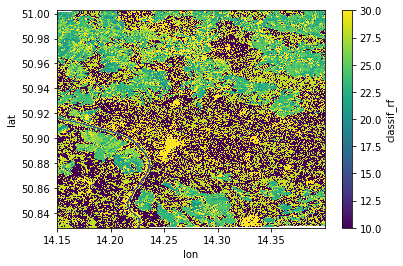

In [37]:
ds_pred.classif_rf.plot()

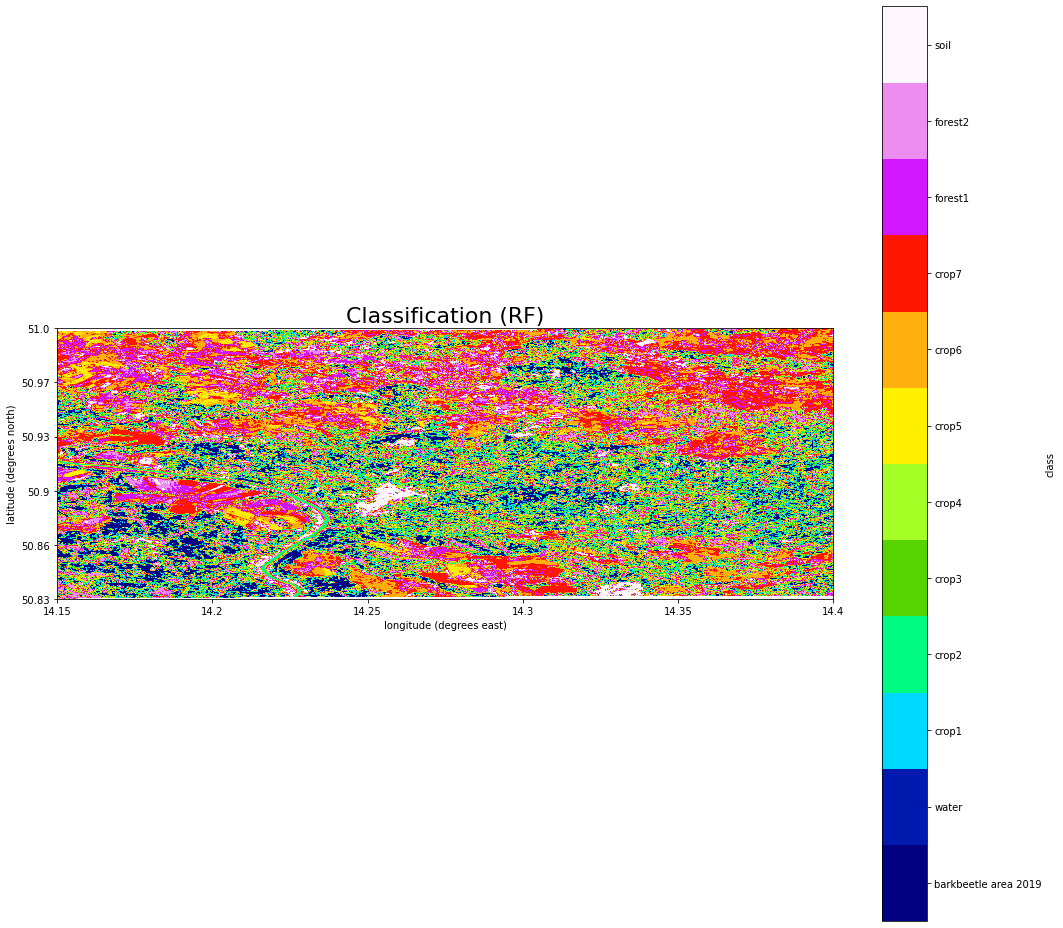

In [42]:
n_class = 12
cmap = plt.cm.get_cmap('gist_ncar', n_class)  # create colormap
legend_labels = ['barkbeetle area 2019', 'water', 'crop1','crop2','crop3','crop4','crop5','crop6','crop7','forest1','forest2','soil']  # define legend labels

plotting_lc(ds_pred, variable='classif_rf',n_clusters=n_class, cmap=cmap, legend_labels=legend_labels,
            title='Classification (RF)', save=True, filename='lc_randomforest')

SAVE_FILENAME = '27_result.png'
PATH = 'D:\\E4\\1606\\' 
SAVE_PATH = PATH
plt.savefig(SAVE_PATH + SAVE_FILENAME )

In [ ]:
#ÄNDERUNG DER PARAMETER

#NTREE = 100

In [28]:
%%time
# This is a magic function to measure the execution time of a cell, which will be plotted below the cell. It has to be 
# written in the first line of the cell.


# Create a random forest classifier
clf_rf2 = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets 
clf_rf2.fit(X_train,y_train)

# apply the random forest to the test data
y_pred_rf2 = clf_rf2.predict(X_test)

y_pred_rf2

Wall time: 17min 46s


array([21., 21., 21., ..., 21., 21., 21.])

In [29]:
# compute the confusion matrix
# see https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for interpretaion example
metrics.confusion_matrix(y_test, y_pred_rf2) 

array([[  8196,    114,  23546,      0,    142],
       [     0, 452992,      0,      0,   1328],
       [     1,      0, 333124,      0,      0],
       [     0,      0,      0,   5195,      0],
       [     0,    858,      0,      2, 108879]], dtype=int64)

In [34]:
# compute the Kappa coefficient bei ntree = 100
metrics.cohen_kappa_score(y_test, y_pred_rf2)

0.9546576690057256

In [36]:
# compute the overall accuracy bei ntree = 100
metrics.accuracy_score(y_test, y_pred_rf2)

0.972183604690612

In [40]:
# compute a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

        10.0       1.00      0.26      0.41     31998
        21.0       1.00      1.00      1.00    454320
        22.0       0.93      1.00      0.97    333125
        23.0       1.00      1.00      1.00      5195
        24.0       0.99      0.99      0.99    109739

    accuracy                           0.97    934377
   macro avg       0.98      0.85      0.87    934377
weighted avg       0.97      0.97      0.97    934377



In [ ]:
#ÄNDERUNG DER PARAMETER

#NTREE = 500

In [33]:
%%time
# This is a magic function to measure the execution time of a cell, which will be plotted below the cell. It has to be 
# written in the first line of the cell.


# Create a random forest classifier
clf_rf3 = RandomForestClassifier(n_estimators=500)

# Train the model using the training sets 
clf_rf3.fit(X_train,y_train)

# apply the random forest to the test data
y_pred_rf3 = clf_rf3.predict(X_test)

y_pred_rf3

Wall time: 29min 45s


array([21., 21., 21., ..., 21., 21., 21.])

In [37]:
# compute the confusion matrix
# see https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for interpretaion example
metrics.confusion_matrix(y_test, y_pred_rf3) 

array([[  8176,    110,  23571,      0,    141],
       [     0, 453001,      0,      0,   1319],
       [     1,      0, 333124,      0,      0],
       [     0,      0,      0,   5195,      0],
       [     0,    895,      0,      2, 108842]], dtype=int64)

In [38]:
# compute the Kappa coefficient bei ntree = 500
metrics.cohen_kappa_score(y_test, y_pred_rf3)

0.9545720980530097

In [39]:
# compute the overall accuracy bei ntree = 500
metrics.accuracy_score(y_test, y_pred_rf3)

0.9721322335631121

In [41]:
# compute a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf3))

              precision    recall  f1-score   support

        10.0       1.00      0.26      0.41     31998
        21.0       1.00      1.00      1.00    454320
        22.0       0.93      1.00      0.97    333125
        23.0       1.00      1.00      1.00      5195
        24.0       0.99      0.99      0.99    109739

    accuracy                           0.97    934377
   macro avg       0.98      0.85      0.87    934377
weighted avg       0.97      0.97      0.97    934377



In [ ]:
#ÄNDERUNG DER PARAMETER

#NTREE = 400

In [42]:
%%time
# This is a magic function to measure the execution time of a cell, which will be plotted below the cell. It has to be 
# written in the first line of the cell.


# Create a random forest classifier
clf_rf4 = RandomForestClassifier(n_estimators=400)

# Train the model using the training sets 
clf_rf4.fit(X_train,y_train)

# apply the random forest to the test data
y_pred_rf4 = clf_rf4.predict(X_test)

y_pred_rf4

Wall time: 24min 33s


array([21., 21., 21., ..., 21., 21., 21.])

In [43]:
# compute the confusion matrix
# see https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for interpretaion example
metrics.confusion_matrix(y_test, y_pred_rf4) 

array([[  8133,    118,  23604,      0,    143],
       [     0, 453004,      0,      0,   1316],
       [     1,      0, 333124,      0,      0],
       [     0,      0,      0,   5195,      0],
       [     0,    876,      0,      2, 108861]], dtype=int64)

In [44]:
# compute the Kappa coefficient bei ntree = 400
metrics.cohen_kappa_score(y_test, y_pred_rf4)

0.9545347856922771

In [45]:
# compute the overall accuracy bei ntree = 400
metrics.accuracy_score(y_test, y_pred_rf4)

0.9721097586948308

In [46]:
# compute a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf4))

              precision    recall  f1-score   support

        10.0       1.00      0.25      0.41     31998
        21.0       1.00      1.00      1.00    454320
        22.0       0.93      1.00      0.97    333125
        23.0       1.00      1.00      1.00      5195
        24.0       0.99      0.99      0.99    109739

    accuracy                           0.97    934377
   macro avg       0.98      0.85      0.87    934377
weighted avg       0.97      0.97      0.96    934377



In [ ]:
#ÄNDERUNG DER PARAMETER

#NTREE = 200

In [47]:
%%time
# This is a magic function to measure the execution time of a cell, which will be plotted below the cell. It has to be 
# written in the first line of the cell.


# Create a random forest classifier
clf_rf5 = RandomForestClassifier(n_estimators=200)

# Train the model using the training sets 
clf_rf5.fit(X_train,y_train)

# apply the random forest to the test data
y_pred_rf5 = clf_rf5.predict(X_test)

y_pred_rf5

Wall time: 12min 1s


array([21., 21., 21., ..., 21., 21., 21.])

In [48]:
# compute the confusion matrix
# see https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for interpretaion example
metrics.confusion_matrix(y_test, y_pred_rf5) 

array([[  8213,    112,  23532,      0,    141],
       [     0, 452960,      0,      0,   1360],
       [     2,      0, 333123,      0,      0],
       [     0,      0,      0,   5195,      0],
       [     0,    903,      0,      2, 108834]], dtype=int64)

In [49]:
# compute the Kappa coefficient bei ntree = 400
metrics.cohen_kappa_score(y_test, y_pred_rf5)

0.9545513335237805

In [50]:
# compute the overall accuracy bei ntree = 400
metrics.accuracy_score(y_test, y_pred_rf5)

0.9721183205494142

In [51]:
# compute a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf5))

              precision    recall  f1-score   support

        10.0       1.00      0.26      0.41     31998
        21.0       1.00      1.00      1.00    454320
        22.0       0.93      1.00      0.97    333125
        23.0       1.00      1.00      1.00      5195
        24.0       0.99      0.99      0.99    109739

    accuracy                           0.97    934377
   macro avg       0.98      0.85      0.87    934377
weighted avg       0.97      0.97      0.97    934377

